# Diplomatura en ciencia de datos, aprendizaje automático y sus aplicaciones - Edición 2023 - FAMAF (UNC)

## Aprendizaje no supervisado

### Trabajo práctico entregable - Grupo 22 - FIFA female players 2023

**Integrantes:**
- Chevallier-Boutell, Ignacio José
- Ribetto, Federico Daniel
- Rosa, Santiago
- Spano, Marcelo

**Seguimiento:** Meinardi, Vanesa

---

## Librerías

Inicializamos el entorno

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows',150)
sns.set_context('talk')
sns.set_theme(style='white')

## Lectura del dataset

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
path = 'female_players.csv'
fifa = pd.read_csv(path)

/tmp/ipykernel_7765/1676569468.py:2: DtypeWarning: Columns (17,20,21,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa = pd.read_csv(path)


---
# Pretratamiento

## Tamaño del dataset

In [3]:
print(f'La base de datos original consta de {fifa.shape[0]} registros y {fifa.shape[1]} variables.')

print(f"Tiene datos desde la versión {fifa['fifa_version'].min()} hasta la versión {fifa['fifa_version'].max()}")

print('\n\nComo nos interesan sólo las jugadoras del 2023, filtramos el dataset para quedarnos con este subconjunto.')

fifa23 = fifa[fifa['fifa_version'] == 23].copy()

print(f'La base de datos 2023 consta de {fifa23.shape[0]} registros y {fifa23.shape[1]} variables.')

fifa23

La base de datos original consta de 181361 registros y 110 variables.
Tiene datos desde la versión 16 hasta la versión 23


Como nos interesan sólo las jugadoras del 2023, filtramos el dataset para quedarnos con este subconjunto.
La base de datos 2023 consta de 7425 registros y 110 variables.


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,78,92,90,76,68,64,92,89,85,90,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,89500000.0,3000.0,31,1990-07-20,187,70,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,LCB,3.0,NaN,2006-07-01,2026.0,18,France,113003.0,LCB,3.0,Right,3,2,5,High/Medium,Lean (185+),Yes,183500000.0,"#Aerial Threat, #Tackling, #Tactician, #Streng...","Leadership, Long Passer (AI), Power Header, Te...",63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,84,55,69,65,58,87,85,65,62,53,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15,NaN,78+3,78+3,78+3,71,75,75,75,71,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,80+3,87+3,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,NaN,NaN,32,1989-07-02,168,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,United States,113009.0,ST,13.0,Left,4,4,5,High/Low,Unique,Yes,NaN,#Clinical Finisher,"Leadership, Finesse Shot, Flair, Speed Dribble...",89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,91,87,87,68,70,82,93,88,89,83,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,87+3,87+3,87+3,86+3,82+3,82+3,82+3,86+3,69+3,67+3,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,143000000.0,3000.0,26,1995-07-10,176,68,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,RES,14.0,NaN,2014-07-01,2024.0,36,Norway,113007.0,ST,14.0,Right,4,4,5,High/Medium,Normal (170-185),Yes,303900000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Leadership, Outside Foot Shot, Technical Dribb...",83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,84,90,91,79,75,72,91,81,85,74,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14,NaN,90+1,90+1,90+1,87,89

## Reducción de variables

Vamos a eliminar aquellas columnas que creemos que no serán relevantes para nuestro objetivo.

In [4]:
fifa23.drop(inplace=True, columns=['player_id', 'player_url', 'fifa_version', 
            'fifa_update', 'fifa_update_date', 'long_name', 'value_eur', 
            'wage_eur', 'dob', 'league_id', 'league_name', 'league_level', 
            'club_team_id', 'club_name', 'club_position', 'club_jersey_number', 
            'club_loaned_from', 'club_joined_date', 
            'club_contract_valid_until_year', 'nationality_id', 
            'nation_team_id', 'nation_position', 'nation_jersey_number', 
            'weight_kg', 'skill_moves', 'international_reputation', 'body_type',
            'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 
            'player_face_url'])

In [5]:
print(f'Ahora tenemos {fifa23.shape[1]} variables ({110-fifa23.shape[1]} menos).')

fifa23

Ahora tenemos 78 variables (32 menos).


,short_name,player_positions,overall,potential,age,height_cm,nationality_name,preferred_foot,weak_foot,work_rate,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,S. Kerr,ST,91,91,28,168,Australia,Right,4,High/High,87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,78,92,90,76,68,64,92,89,85,90,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3
1,W. Renard,CB,91,91,31,187,France,Right,3,High/Medium,63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,84,55,69,65,58,87,85,65,62,53,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15,NaN,78+3,78+3,78+3,71,75,75,75,71,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,80+3,87+3,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3
2,A. Morgan,ST,90,90,32,168,United States,Left,4,High/Low,89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,91,87,87,68,70,82,93,88,89,83,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,87+3,87+3,87+3,86+3,82+3,82+3,82+3,86+3,69+3,67+3,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3
3,A. Hegerberg,ST,90,91,26,176,Norway,Right,4,High/Medium,83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,84,90,91,79,75,72,91,81,85,74,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14,NaN,90+1,90+1,90+1,87,89,89,89,87,87+3,87+3,87+3,85+3,78+3,78+3,78+3,85+3,63+3,61+3,61+3,61+3,63+3,60+3,56+3,56+3,56+3,60+3,20+3
4,L. Bronze,RB,89,89,30,171,England,Right,3,High/High,85.0,77.0,82.0,83.0,88.0,89.0,87,73,82,85,66,79,88,81,80,85,85,85,86,89,82,85,92,90,90,86,82,85,73,73,62,86.0,89,91,89,10,14,16,8,15,NaN,81+3,81+3,81+3,82,81,81,81,82,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,87+2,86+3,86+3,86+3,87+2,87+2,87+2,87+2,87+2,87+2,20+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7420,B. Cairns,CM,57,77,19,170,England,Right,3,Medium/Medium,74.0,57.0,57.0,60.0,53.0,61.0,49,55,42,61,51,58,47,49,59,59,73,75,70,45,71,66,71,55,68,53,47,45,59,61,55,58.0,55,57,59,13,7,13,12,11,NaN,58+2,58+2,58+2,59,59,59,59,59,59+2,59+2,59+2,59+2,57+2,57+2,57+2,59+2,56+2,55+2,55+2,55+2,56+2,56+2,55+2,55+2,55+2,56+2,15+2
7421,M. Barker,RB,57,66,20,169,England,Right,3,Medium/Medium,54.0,49.0,55.0,59.0,55.0,61.0,59,48,50,59,56,58,64,45,51,56,53,55,62,58,66,57,41,48,71,42,58,59,44,48,48,72.0,60,50,51,8,13,10,11,14,NaN,53+2,53+2,53+2,54,53,53,53,54,53+2,53+2,53+2,54+2,53+2,53+2,53+2,54+2,56+2,56+2,56+2,56+2,56+2,55+2,56+2,56+2,56+2,55+2,17+2
7422,I. Goodwin,ST,57,72,19,181,England,Right,3,Medium/Low,59.0,54.0,52.0,60.0,34.0,61.0,37,49,45,63,47,59,48,51,45,61,66,54,71,55,47,69,54,49,70,53,57,27,56,54,56,61.0,31,37,39,13,7,13,12,13,NaN,57+2,57+2,57+2,56,57,57,57,56,58+2,58+2,58+2,55+2,53+2,53+2,53+2,55+2,46+2,47+2,47+2,47+2,46+2,44+2,45+2,45+2,45+2,44+2,16+2
7423,J. Vermersc,"LB, RB",57,65,22,165,Belgium,Left,3,Medium/Medium,61.0,52.0,50.0,61.0,54.0,66.0,55,53,48,52,24,62,49,59,41,60,62,61,59,47,67,52,71,61,75,56,49,51,52,48,49,60.0,55,57,54,14,10,9,14,9

## Datos faltantes

Tenemos valores faltantes en `pace`, `shooting`, `passing`, `dribbling`, `defending`, `physic` y `goalkeeping_speed`. Entre las primeras 6 variables el mapa de calor de missingno nos arroja un valor de +1.00, lo cual indica que existe una probabilidad del 100% de que cuando falte un valor en la variable que está en la fila, va a faltar en la variable que está en la columna. Por ejemplo, cuando falta en `shooting`, también falta en `pace` y así. Para el caso de la variable `goalkeeping_speed` pasa lo opuesto, ya que tiene un valor de -1.00: siempre que falte un dato en esta variable, no faltará el dato asociado a las otras variables.

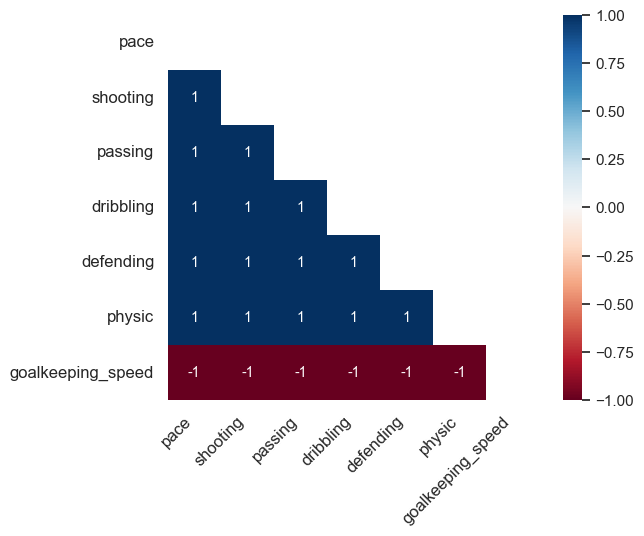

In [6]:
msno.heatmap(fifa23, fontsize=12, figsize=(6, 5))
plt.show()

Acá ejemplificamos lo que acabamos de decir.

In [7]:
faltantes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed']
fifa23[faltantes].iloc[45:55]

,pace,shooting,passing,dribbling,defending,physic,goalkeeping_speed
45,NaN,NaN,NaN,NaN,NaN,NaN,38.0
46,77.0,82.0,87.0,86.0,57.0,73.0,NaN
47,86.0,77.0,83.0,85.0,77.0,78.0,NaN
48,68.0,86.0,83.0,82.0,44.0,82.0,NaN
49,81.0,39.0,70.0,72.0,86.0,78.0,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,46.0
51,71.0,43.0,65.0,63.0,87.0,78.0,NaN
52,79.0,80.0,80.0,87.0,46.0,55.0,NaN
53,69.0,46.0,72.0,70.0,85.0,79.0,NaN
54,73.0,86.0,79.0,86.0,43.0,71.0,NaN


Analizando los datos faltantes, están asociados a ser o no ser arquera. Esto lleva a que podríamos diferenciar el dataset entre arqueras y no arqueras. También esto nos da una pauta de qué características responden a alguien que recorre la cancha respecto a alguien que se queda al arco.

In [8]:
fifa23[faltantes].info()

print(f"\n\nCantidad de arqueras: {len(fifa23[fifa23['player_positions'] == 'GK'])}")

<class 'pandas.core.frame.DataFrame'>
Index: 7425 entries, 0 to 7424
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pace               6523 non-null   float64
 1   shooting           6523 non-null   float64
 2   passing            6523 non-null   float64
 3   dribbling          6523 non-null   float64
 4   defending          6523 non-null   float64
 5   physic             6523 non-null   float64
 6   goalkeeping_speed  902 non-null    float64
dtypes: float64(7)
memory usage: 464.1 KB


Cantidad de arqueras: 902


**Nota:** Además de lo que acabamos de ver, no se cuenta con una descripción precisa para las variables `pace`, `shooting`, `passing`, `dribbling`, `defending` y `physic`. En algunos casos, son superadas por otras variables. Se decide entonces eliminar estas variables.

In [9]:
fifa23.drop(inplace=True, columns=['pace', 'shooting', 'passing', 'dribbling', 
                                   'defending', 'physic'])

## Simplificación de valores en variables

El `work_rate` de cada jugadora tiene el formato ataque/defensa, catalogando cada uno en `Low`, `Medium` y `High`. Desglosamos esta variable en 2 variables diferentes: `att_work_rate` y `def_work_rate`. Luego, eliminamos la variable original.

In [10]:
fifa23['att_work_rate'] = [i.split('/')[0] for i in fifa23['work_rate']]
fifa23['def_work_rate'] = [i.split('/')[1] for i in fifa23['work_rate']]
fifa23.drop(columns=['work_rate'],inplace=True)

Los puntajes de las posiciones aparecen con sumas y restas. Queremos que sean sólo enteros.

In [11]:
for col in ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
            'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 
            'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']:
    new = []
    for i in fifa23[col]:
        if len(i.split('+')) == 2:
            new.append(int(i.split('+')[0])+int(i.split('+')[1]))
        elif len(i.split('-')) == 2:
            new.append(int(i.split('-')[0])-int(i.split('-')[1]))
        else:
            new.append(int(i))

    fifa23[col] = new

En la variable `player_positions` hay jugadoras que poseen dos o incluso tres posiciones.

In [12]:
col = 'player_positions'
p1, p2, p3 = 0, 0, 0
for i in fifa23[col]:
    if len(i.split(',')) == 3:
        p3 += 1
    elif len(i.split(',')) == 2:
        p2 += 1
    else:
        p1 += 1
tot = fifa23.shape[0]

print(f'De las {tot} jugadoras:')
print(f'\tPresentan 1 posición   >> {p1} ({100*p1/tot:.2f}%)')
print(f'\tPresentan 2 posiciones >> {p2} ({100*p2/tot:.2f}%)')
print(f'\tPresentan 3 posiciones >> {p3} ({100*p3/tot:.2f}%)')

De las 7425 jugadoras:
	Presentan 1 posición   >> 3658 (49.27%)
	Presentan 2 posiciones >> 2826 (38.06%)
	Presentan 3 posiciones >> 941 (12.67%)


Notamos que de las 27 posibles categorías, sólo se usan 15 para establecer la posición.

In [13]:
new = []
for i in fifa23[col]:
    if len(i.split(',')) > 1:
        for k in range(len(i.split(','))):
            new.append(i.split(', ')[k])
    else:
        new.append(i)

new = np.array(new)
A = np.unique(new)

print(f'El array tiene {len(A)} elementos. Estos son:')
a = np.char.lower(A)
print(a)

El array tiene 15 elementos. Estos son:
['cam' 'cb' 'cdm' 'cf' 'cm' 'gk' 'lb' 'lm' 'lw' 'lwb' 'rb' 'rm' 'rw' 'rwb'
 'st']


Vamos a modificar los valores de esta variable para que sólo aparezca una posición, eligiendo la que tenga el mayor rating asociado.

In [14]:
df_pos = fifa23[[col]+list(a)].copy()
new = []
k = 0
for i in df_pos[col]:
    if len(i.split(', ')) == 3:
        pos1 = i.split(', ')[0].lower()
        pos2 = i.split(', ')[1].lower()
        pos3 = i.split(', ')[2].lower()

        l = [df_pos[pos1][k], df_pos[pos2][k], df_pos[pos3][k]]
        idx = l.index(max(l))
        
        new.append(i.split(', ')[idx])

    elif len(i.split(', ')) == 2:
        pos1 = i.split(', ')[0].lower()
        pos2 = i.split(', ')[1].lower()

        l = [df_pos[pos1][k], df_pos[pos2][k]]
        idx = l.index(max(l))
        
        new.append(i.split(', ')[idx])

    else:
        new.append(i)

    k += 1

fifa23[col] = new

## Simplificación de variables

Vamos a simplificar el nombre de varias variables.

In [15]:
varsdic = {'short_name' : 'name', 'player_positions' : 'position', 
           'height_cm' : 'height', 'nationality_name' : 'nationality', 
           'attacking_crossing' : 'crossing', 
           'attacking_finishing' : 'finishing', 
           'attacking_heading_accuracy' : 'heading', 
           'attacking_short_passing' : 'short_passing', 
           'attacking_volleys' : 'volleys', 'skill_dribbling' : 'dribbling', 
           'skill_curve' : 'curve', 'skill_fk_accuracy' : 'fk_acc', 
           'skill_long_passing' : 'long_passing', 
           'skill_ball_control' : 'ball_control', 
           'movement_acceleration' : 'acceleration', 
           'movement_sprint_speed' : 'sprint', 'movement_agility' : 'agility', 
           'movement_reactions' : 'reactions', 'movement_balance' : 'balance', 
           'power_shot_power' : 'shot_power', 'power_jumping' : 'jumping', 
           'power_stamina' : 'stamina', 'power_strength' : 'strength', 
           'power_long_shots' : 'long_shots', 
           'mentality_aggression' : 'aggression', 
           'mentality_interceptions' : 'interceptions', 
           'mentality_positioning' : 'positioning', 
           'mentality_vision' : 'vision', 'mentality_penalties' : 'penalties', 
           'mentality_composure' : 'composure', 
           'defending_marking_awareness' : 'marking', 
           'defending_standing_tackle' : 'standing_tackle', 
           'defending_sliding_tackle' : 'sliding_tackle', 
           'goalkeeping_diving' : 'diving', 'goalkeeping_handling' : 'handling', 
           'goalkeeping_kicking' : 'kicking_gk', 
           'goalkeeping_positioning' : 'positioning_gk', 
           'goalkeeping_reflexes' : 'reflexes', 
           'goalkeeping_speed' : 'speed_gk'}

In [16]:
fifa23.rename(columns = varsdic, inplace = True)

In [17]:
# Se reordenan las columnas
fifa23 = fifa23[['name', 'nationality', 'age', 'height', 'position', 
                 'preferred_foot', 'weak_foot', 'att_work_rate', 
                 'def_work_rate', 'overall', 'potential', 'crossing', 
                 'finishing', 'heading', 'short_passing', 'volleys', 'marking', 
                 'standing_tackle', 'sliding_tackle', 'acceleration', 'sprint', 
                 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 
                 'stamina', 'strength', 'long_shots', 'dribbling', 'curve', 
                 'fk_acc', 'long_passing', 'ball_control', 'aggression', 
                 'interceptions', 'positioning', 'vision', 'penalties', 
                 'composure', 'diving', 'handling', 'kicking_gk', 
                 'positioning_gk', 'reflexes', 'speed_gk', 'ls', 'st', 'rs', 
                 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 
                 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 
                 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']]

fifa23

,name,nationality,age,height,position,preferred_foot,weak_foot,att_work_rate,def_work_rate,overall,potential,crossing,finishing,heading,short_passing,volleys,marking,standing_tackle,sliding_tackle,acceleration,sprint,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,dribbling,curve,fk_acc,long_passing,ball_control,aggression,interceptions,positioning,vision,penalties,composure,diving,handling,kicking_gk,positioning_gk,reflexes,speed_gk,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,S. Kerr,Australia,28,168,ST,Right,4,High,High,91,91,70,93,91,78,92,44,39,30,89,85,90,91,82,91,91,87,86,89,90,76,68,64,92,70,24,95,79,75,92.0,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,89,89,89,88,81,81,81,88,67,65,65,65,67,64,61,61,61,64,23
1,W. Renard,France,31,187,CB,Right,3,High,Medium,91,91,51,70,96,84,55,93,94,91,65,62,53,90,34,85,86,75,93,65,69,65,58,87,85,88,90,70,59,75,84.0,7,14,17,11,15,NaN,81,81,81,71,75,75,75,71,77,77,77,75,82,82,82,75,83,90,90,90,83,85,91,91,91,85,24
2,A. Morgan,United States,32,168,ST,Left,4,High,Low,90,90,71,95,86,91,87,41,43,39,88,89,83,84,67,90,81,87,81,83,87,68,70,82,93,53,46,92,75,88,92.0,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,90,90,90,89,85,85,85,89,72,70,70,70,72,69,63,63,63,69,22
3,A. Hegerberg,Norway,26,176,ST,Right,4,High,Medium,90,91,71,94,93,84,90,42,33,30,81,85,74,92,47,86,89,75,81,89,91,79,75,72,91,65,23,96,76,86,86.0,15,7,12,10,14,NaN,91,91,91,87,89,89,89,87,90,90,90,88,81,81,81,88,66,64,64,64,66,63,59,59,59,63,23
4,L. Bronze,England,30,171,RB,Right,3,High,High,89,89,87,73,82,85,66,89,91,89,85,85,86,89,82,85,92,90,90,86,79,88,81,80,85,82,85,73,73,62,86.0,10,14,16,8,15,NaN,84,84,84,82,81,81,81,82,84,84,84,85,85,85,85,85,89,89,89,89,89,89,89,89,89,89,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7420,B. Cairns,England,19,170,CM,Right,3,Medium,Medium,57,77,49,55,42,61,51,55,57,59,73,75,70,45,71,66,71,55,68,53,58,47,49,59,59,47,45,59,61,55,58.0,13,7,13,12,11,NaN,60,60,60,59,59,59,59,59,61,61,61,61,59,59,59,61,58,57,57,57,58,58,57,57,57,58,17
7421,M. Barker,England,20,169,RB,Right,3,Medium,Medium,57,66,59,48,50,59,56,60,50,51,53,55,62,58,66,57,41,48,71,42,58,64,45,51,56,58,59,44,48,48,72.0,8,13,10,11,14,NaN,55,55,55,54,53,53,53,54,55,55,55,56,55,55,55,56,58,58,58,58,58,57,58,58,58,57,19
7422,I. Goodwin,England,19,181,ST,Right,3,Medium,Low,57,72,37,49,45,63,47,31,37,39,66,54,71,55,47,69,54,49,70,53,59,48,51,45,61,57,27,56,54,56,61.0,13,7,13,12,13,NaN,59,59,59,56,57,57,57,56,60,60,60,57,55,55,55,57,48,49,49,49,48,46,47,47,47,46,18
7423,J. Vermersc,Belgium,22,165,LB,Left,3,Medium,Medium,57,65,55,53,48,52,24,55,57,54,62,61,59,47,67,52,71,61,75,56,62,49,59,41,60,49,51,52,48,49,60.0,14,10,9,14,9,NaN,56,56,56,56,55,55,55,56,56,56,56,57,54,54,54,57,58,55,55,55,58,57,58,58,58,57,17


## Guardado del dataset

El dataset que guardamos consta de 7425 registros con 73 variables.

In [18]:
fifa23.to_csv('fifa2023.csv', index=False)

## Diccionario

Diccionario del dataset generado hasta ahora.

> Identificación de la jugadora
* `name`: nombre de la jugadora. Se usará sólo para identificar los resultados.
* `nationality`: nacionalidad de la jugadora. Se usará sólo para identificar los resultados.
* `age`: edad de la jugadora.
* `height`: altura de la jugadora, en centímetros.

> Características generales
* `position`: posición en la cancha de la jugadora, denotada con siglas. Puede tener más de una. Cada una de estas opciones representa a su vez una variable que determina el puntaje asignado en dicha posición, del 1 al 99. Las posibilidades son:
    * `ls`: pateadora izquierda. <span style="color:orange">Ninguna jugadora posee esta posición.</span>
    * `st`: pateadora central.
    * `rs`: pateadora derecha. <span style="color:orange">Ninguna jugadora posee esta posición.</span>
    * `lw`: volante delantera izquierda.
    * `lf`: delantera izquierda. <span style="color:orange">Ninguna jugadora posee esta posición.</span>
    * `cf`: delantera central.
    * `rf`: delantera derecha. <span style="color:orange">Ninguna jugadora posee esta posición.</span>
    * `rw`: volante delantera derecha.
    * `lam`: mediocampista ofensiva izquierda. <span style="color:orange">Ninguna jugadora posee esta posición.</span>
    * `cam`: mediocampista ofensiva central.
    * `ram`: mediocampista ofensiva derecha. <span style="color:orange">Ninguna jugadora posee esta posición.</span>
    * `lm`: mediocampista izquierda.
    * `lcm`: mediocampista centro-izquierda. <span style="color:orange">Ninguna jugadora posee esta posición.</span>
    * `cm`: mediocampista central.
    * `rcm`: mediocampista centro-derecha. <span style="color:orange">Ninguna jugadora posee esta posición.</span>
    * `rm`: mediocampista derecha.
    * `lwb`: volante defensora izquierda.
    * `ldm`: mediocampista defensiva izquierda. <span style="color:orange">Ninguna jugadora posee esta posición.</span>
    * `cdm`: mediocampista defensiva central.
    * `rdm`: mediocampista defensiva derecha. <span style="color:orange">Ninguna jugadora posee esta posición.</span>
    * `rwb`: volante defensora izquierda.
    * `lb`: defensora izquierda.
    * `lcb`: defensora centro-izquierda. <span style="color:orange">Ninguna jugadora posee esta posición.</span>
    * `cb`: defensora central.
    * `rcb`: defensora centro-derecha. <span style="color:orange">Ninguna jugadora posee esta posición.</span>
    * `rb`: defensora derecha.
    * `gk`: arquera.
* `preferred_foot`: pie más hábil (izquierdo o derecho).
* `weak_foot`: qué tan bien juega con su pie menos hábil, puntuado del 1 al 5.
* `att_work_rate`: qué tanto se esfuerza la jugadora en términos ofensivos. Se evalua como low, medium y high.
* `def_work_rate`: qué tanto se esfuerza la jugadora en términos defensivos. Se evalua como low, medium y high.
* `overall`: desempeño general y valoración de la jugadora, basado en las habilidades por posición y en su reputación internacional. Valores desde 1 a 99.
* `potential`: calificación general máxima que se espera que alcance la jugadora en la cima de su carrera. Valores desde 1 a 99.

> Características ofensivas
* `crossing`: habilidad para hacer un pase largo desde los lados hacia el centro. Valores desde 1 a 99.
* `finishing`: habilidad para concretar un gol. Valores desde 1 a 99.
* `heading`: habilidad para dar pases o hacer goles, usando la cabeza. Valores desde 1 a 99.
* `short_passing`: exactitud con que la jugadora da pases cortos. Valores desde 1 a 99.
* `volleys`: habilidad para hacer voleas. Valores desde 1 a 99.

> Características defensivas
* `marking`: habilidad de aplicar estrategias que prevengan que el equipo contrario tome la pelota. Valores desde 1 a 99.
* `standing_tackle`: capacidad de quitarle la pelota a la rival, manteniéndose de pie. Valores desde 1 a 99.
* `sliding_tackle`: capacidad de quitarle la pelota a la rival, deslizándose por el suelo. Valores desde 1 a 99.

> Movimientos
* `acceleration`: qué tan rápido alcanza su máxima velocidad. Valores desde 1 a 99.
* `sprint`: velocidad de pique. Valores desde 1 a 99.
* `agility`: destreza de la jugadora a la hora de moverse, teniendo el control de la pelota. Valores desde 1 a 99.
* `reactions`: velocidad de reacción de la jugadora a su entorno. Valores desde 1 a 99.
* `balance`: habilidad de la jugadora para mantenerse estable mientras corre, lleva y controla la pelota. Valores desde 1 a 99.

> Potencia
* `shot_power`: potencia de la jugadora al patear la pelota. Valores desde 1 a 99.
* `jumping`: potencia de la jugadora al saltar. Valores desde 1 a 99.
* `stamina`: resistencia de la jugadora (durabilidad en un mismo partido). Valores desde 1 a 99.
* `strength`: fuerza física de la jugadora. Valores desde 1 a 99.
* `long_shots`: exactitud de la jugadora al hacer pases largos. Valores desde 1 a 99.

> Habilidades físicas
* `dribbling`: habilidad para desplazarse sin perder la pelota. Valores desde 1 a 99.
* `curve`: habilidad de patear una pelota curva al pasar o al apuntar al arco. Valores desde 1 a 99.
* `fk_acc`: habilidad para hacer gol desde un tiro libre. Valores desde 1 a 99.
* `long_passing`: habilidad para hacer pases largos. Valores desde 1 a 99.
* `ball_control`: habilidad para controlar la pelota. Valores desde 1 a 99.

> Otras destrezas
* `aggression`: nivel de agresividad de la jugadora a la hora de empujar, tirar o quitar la pelota. Valores desde 1 a 99.
* `interceptions`: habilidad de la jugadora para interceptar la pelota cuando se la pasan entre las del equipo contrario. Valores desde 1 a 99.
* `positioning`: habilidad para situarse en la posición adecuada al momento de recibir la pelota o anotar goles. Valores desde 1 a 99.
* `vision`: conciencia de la jugadora respecto a las demás jugadoras de su equipo para hacer jugadas en conjunto. Valores desde 1 a 99.
* `penalties`: habilidad para hacer gol en un penal. Valores desde 1 a 99.
* `composure`: habilidad de la jugadora para mantener la calma y manejar la frustración dentro durante el partido. Valores desde 1 a 99.

> Habilidades como arquera
* `diving`: habilidad de la arquera para tirarse de palomita. Valores desde 1 a 99.
* `handling`: habildiad de la arquera para manipular la pelota (con las manos). Valores desde 1 a 99.
* `kicking_gk`: habildiad de la arquera para manipular la pelota (con los pies). Valores desde 1 a 99.
* `positioning_gk`: habilidad de la arquera para situarse en la posición adecuada al momento de recibir la pelota. Valores desde 1 a 99.
* `reflexes`: velocidad en los reflejos de la arquera. Valores desde 1 a 99.
* `speed_gk`: velocidad en los movimientos de la arquera. Valores desde 1 a 99.

---
# Exploración y visualización

In [ ]:
if 'fifa23' not in locals():
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import missingno as msno

    pd.set_option('display.max_columns', 150)
    pd.set_option('display.max_rows',150)
    sns.set_context('talk')
    sns.set_theme(style='white')

    fifa23 = pd.read_csv('fifa2023.csv')

posorder = ['ST', 'LW', 'CF', 'RW', 'CAM', 'LM', 'CM', 'RM', 'LWB', 'CDM', 'RWB', 'LB', 'CB', 'RB', 'GK']

fifa23

In [ ]:
sns.countplot(data=fifa23, y='position', order=posorder)
plt.show()

## Delanteras

In [ ]:
delanteras = fifa23[fifa23['position'] == 'LB']
delanteras

## Mediocampistas

## Defensoras

## Arqueras